In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()

import warnings                                            
warnings.filterwarnings('ignore') 



In D:\software\installs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\software\installs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\software\installs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\software\installs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\software\installs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.

<div dir=ltr>
    <h2>
        The first part is data cleansing
    </h2>
    </div>

<div dir=ltr>
In this section we will load the data to get an understanding of it and show the first few lines of it.    
</div>

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*


<div dir=ltr>
In this section we try to display the following information from the data:

Display the data type of each column (numeric or non-numeric) Display the percentage of Null data of each column for columns with numerical data Statistical information (mean, variance, smallest and largest). For columns with non-numeric data, display the number of unique elements in that column (unique)
</div>

In [ ]:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
Loaned Before       object
dtype: object

percentage of the null data

In [ ]:
null_columns = data.columns[data.isnull().any()]
data[data.columns].isnull().sum()/data[null_columns].count() * 100

Age                       NaN
Checking account    65.016502
Credit amount             NaN
Duration                  NaN
Housing                   NaN
Job                       NaN
Loaned Before             NaN
Purpose                   NaN
Risk                      NaN
Saving accounts     22.399021
Sex                       NaN
Unnamed: 0                NaN
dtype: float64

percentage of the null data

In [ ]:
data[null_columns].isnull().sum()/data[null_columns].count() * 100

Saving accounts     22.399021
Checking account    65.016502
dtype: float64

average of columns

In [ ]:
data[data.columns[[0,1,3,7,8]]].mean()

Unnamed: 0        499.500
Age                35.546
Job                 1.904
Credit amount    3271.258
Duration           20.903
dtype: float64

variance of columns

In [ ]:
data[data.columns[[0,1,3,7,8]]].var()

Unnamed: 0       8.341667e+04
Age              1.294013e+02
Job              4.272112e-01
Credit amount    7.967843e+06
Duration         1.454150e+02
dtype: float64

smallest data in each column

In [ ]:
data[data.columns[[0,1,3,7,8]]].min()

Unnamed: 0         0
Age               19
Job                0
Credit amount    250
Duration           4
dtype: int64

biggest data in each column

In [ ]:
data[data.columns[[0,1,3,7,8]]].max()

Unnamed: 0         999
Age                 75
Job                  3
Credit amount    18424
Duration            72
dtype: int64

number of uniqe data

In [ ]:
data.describe(include='all').loc['unique', :]

Unnamed: 0          NaN
Age                 NaN
Sex                   2
Job                 NaN
Housing               3
Saving accounts       4
Checking account      3
Credit amount       NaN
Duration            NaN
Purpose               8
Risk                  2
Loaned Before         9
Name: unique, dtype: object

number of unique data

In [ ]:
data.describe(include='all').loc['unique', :][[2,4,5,6,9,10,11]]

Sex                 2
Housing             3
Saving accounts     4
Checking account    3
Purpose             8
Risk                2
Loaned Before       9
Name: unique, dtype: object

<div dir=ltr>
As you can see, the first column does not have a name, so we give it a proper name.    
</div>

In [ ]:
data.rename( columns={'Unnamed: 0':'id'}, inplace=True )
data

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,996,40,male,3,own,little,little,3857,30,car,good,T
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good,T
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,N


<div dir=ltr>
Loaned Before column information
    Are heterogeneous because of the collection of data from different databases. We process all this data in one way.   
</div>

In [ ]:
data["Loaned Before"][data["Loaned Before"] == "T"] = True
data["Loaned Before"][data["Loaned Before"] == "Y"] = True
data["Loaned Before"][data["Loaned Before"] == "1"] = True
data["Loaned Before"][data["Loaned Before"] == "F"] = False
data["Loaned Before"][data["Loaned Before"] == "N"] = False
data["Loaned Before"][data["Loaned Before"] == "0"] = False
data["Loaned Before"].loc[(data["Loaned Before"] != True) & (data["Loaned Before"] != False)] = "NaN"

In [ ]:
pd.unique(data["Loaned Before"])

array([True, False, 'NaN'], dtype=object)

<div dir=ltr>
We make a decision for columns that have empty data and to make this decision, we first examine the methods of dealing with empty data and describe four of the policies that can be adopted here.
    And empty values ​​in the current dataframe with
    no-info
    We will replace
</div>

#### 1) Replace with a phrase like
#### "no-info"
#### 2) Delete the above data
#### 3) Put a value instead of this data that this approach has two modes
#### A: Replace with a fixed value. For example, replace all data of this type with the average of other data
#### b) Substitute with variable values. In this method, we predict a value for each data. This method also has several solutions
#### The most popular of these is substituting the value of each data using the previous and next few data of the above data, for example, close data average
#### There are more numerical methods, such as interpolation

In [ ]:
data.replace("NaN", "no-info")
data.fillna("no-info", inplace=True)
data.head(15)

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,no-info,little,1169,6,radio/TV,good,True
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,True
2,2,49,male,1,own,little,no-info,2096,12,education,good,False
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,False
4,4,53,male,2,free,little,little,4870,24,car,bad,NaN
5,5,35,male,1,free,no-info,no-info,9055,36,education,good,True
6,6,53,male,2,own,quite rich,no-info,2835,24,furniture/equipment,good,NaN
7,7,35,male,3,rent,little,moderate,6948,36,car,good,True
8,8,61,male,1,own,rich,no-info,3059,12,radio/TV,good,NaN
9,9,28,male,3,own,little,moderate,5234,30,car,bad,False


<div dir=ltr>
    <h2>
        EDA 
    </h2>
    </div>

<div dir=ltr>
So far we have been a little familiar with the data and also tried to correct the problems that existed in this data. In this section, we go to the EDA to expand our view on this data.
</div>

<div dir=ltr>
In a chart, we compare the number of good and bad people at risk.
    </div>

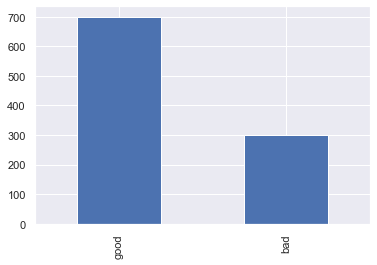

In [ ]:
data['Risk'].value_counts().plot(kind = 'bar');

<div dir=ltr>
We do the same thing with the previous question, this time by gender (in a diagram.)
    </div>

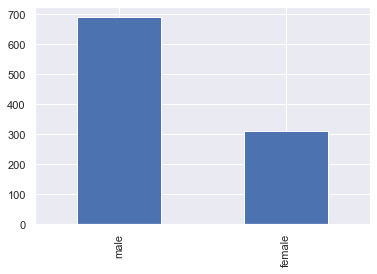

In [ ]:
data['Sex'].value_counts().plot(kind = 'bar');

In [ ]:
import seaborn as sns

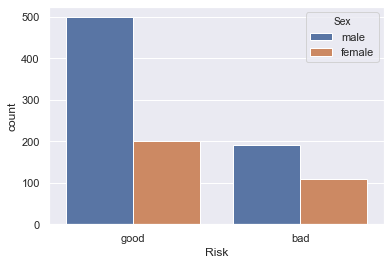

In [ ]:
sns.countplot(x = "Risk", hue = "Sex", data = data)
plt.show()

<div dir=ltr>
Instead of segregating by gender, we categorize people by duration (Duration) and show the risk of lending to them in a chart.
    </div>

In [ ]:
g = data[data["Risk"]=="good"]["Duration"]
b = data[data["Risk"]=="bad"]["Duration"]

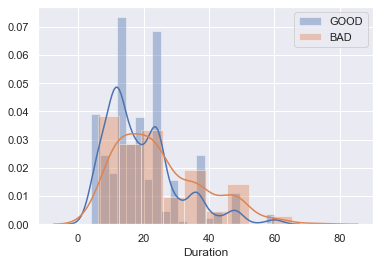

In [ ]:
sns.distplot(g, label='GOOD', hist=True);
sns.distplot(b, label='BAD', hist=True);
plt.legend();

<div dir=ltr>
There are four types of job categories for these people.
In a diagram, we specify how many people of each gender are working in each job category.
</div>

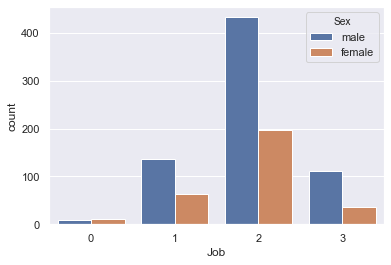

In [ ]:
sns.countplot(x = "Job", hue = "Sex", data = data)
plt.show()

<div dir=ltr>
We show the estimated distribution chart of the borrowers' age</div>

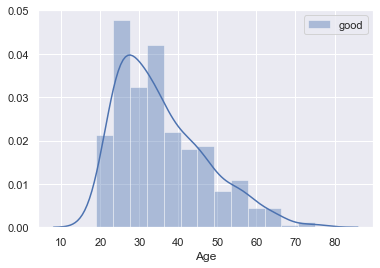

In [ ]:
l_b = data[data["Loaned Before"] == True]["Age"]
sns.distplot(l_b,label="good",hist=True)
plt.legend();

#### This chart shows that most lenders are between 25 and 35 years old
#### The distribution is similar to the normal distribution with a straight or chi-2 skew

<div dir=ltr>
In this bank, loans are paid to applicants for 8 reasons.
    In each job category, we need to identify the main reason why people want to borrow.</div>

In [ ]:
data[["Job","Purpose"]].groupby("Job").agg(lambda x: x.value_counts().index[0])

,Purpose
Job,
0,car
1,car
2,radio/TV
3,car


<div dir=ltr>
To decide on the risk of loan repayment for different reasons, we examine the reason for the loan payment and the degree of good or bad risk, and if in each cause and gender, the number of people with good risk to borrow at least twice The number of people at risk was bad. We show the cause, gender, and number of good and bad people who tried to get it separately in graphs.
</div>

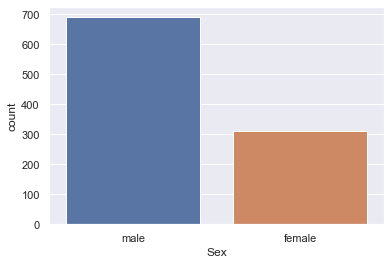

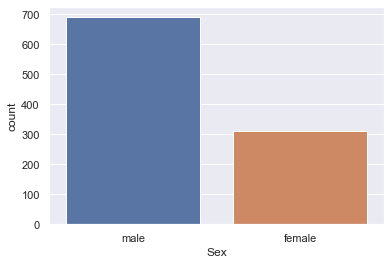

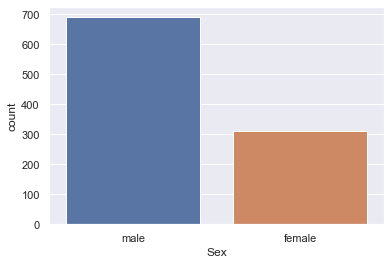

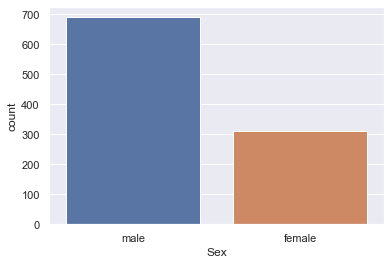

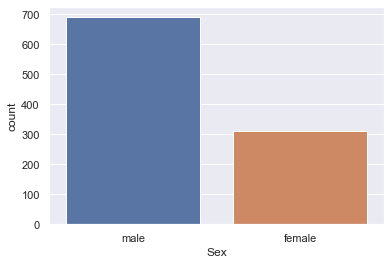

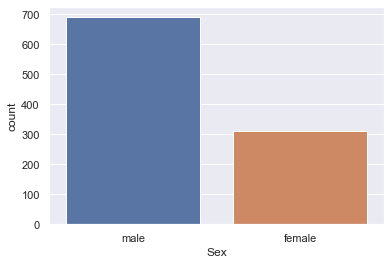

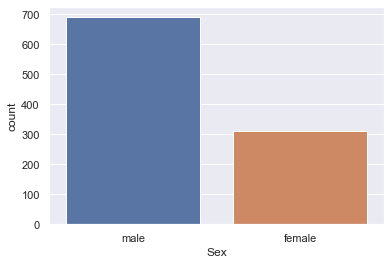

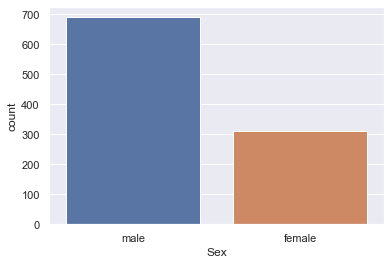

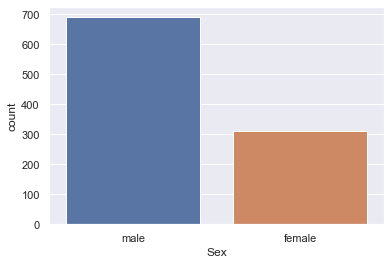

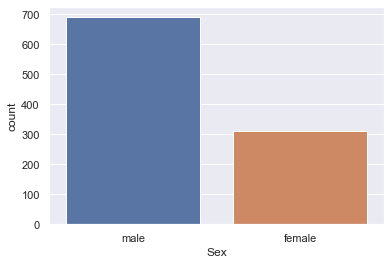

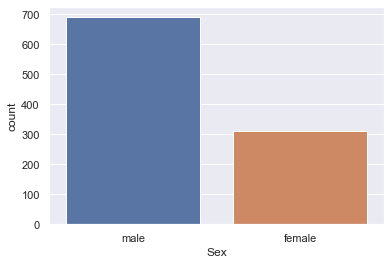

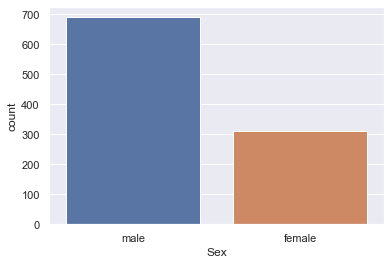

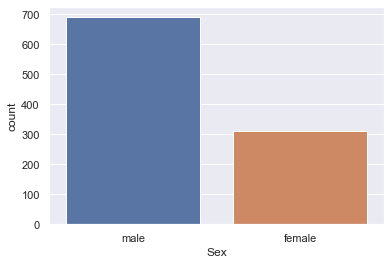

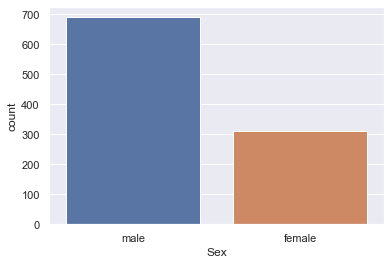

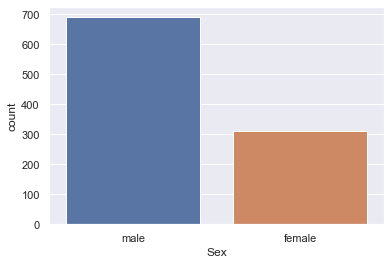

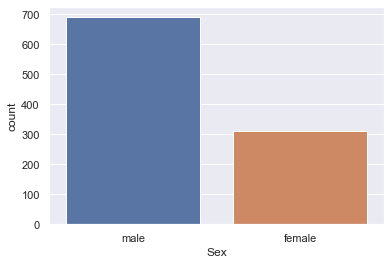

In [ ]:
for i in range(len(pd.unique(data['Purpose']))):
  for j in range(len(pd.unique(data['Sex']))):
    if(data.loc[(data['Purpose']==i) & (data["Sex"] == j) & (data["Risk"] == 1) ].shape[0] 
       >= 2*data.loc[(data['Purpose']==i) & (data["Sex"] == j) & (data["Risk"] == 2) ].shape[0]):
     sns.countplot(x=data["Sex"] );
     plt.show();


<div dir=ltr>
Display the risk of indebtedness of each occupational group by gender in four graphs separately.
</div>

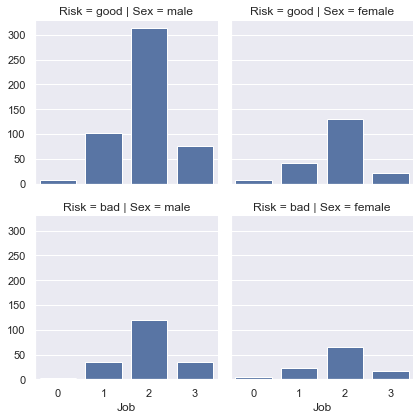

In [ ]:
sns.FacetGrid(data, col= "Sex", row= "Risk").map(sns.countplot, "Job")

<div dir=ltr>
We numerize all the data.
</div>

In [ ]:
DiscriptionValues = ["Sex","Housing","Saving accounts","Checking account", "Credit amount", "Purpose", "Risk", "Loaned Before"]
data[DiscriptionValues] = data[DiscriptionValues].apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))
data.head(15)

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,0,2,0,0,0,0,6,0,0,0
1,1,22,1,2,0,1,1,1,48,0,1,0
2,2,49,0,1,0,1,2,2,12,1,0,1
3,3,45,0,2,1,1,0,3,42,2,0,1
4,4,53,0,2,1,1,0,4,24,3,1,2
5,5,35,0,1,1,0,2,5,36,1,0,0
6,6,53,0,2,0,2,2,6,24,2,0,2
7,7,35,0,3,2,1,1,7,36,3,0,0
8,8,61,0,1,0,3,2,8,12,0,0,2
9,9,28,0,3,0,1,1,9,30,3,1,1


<div dir=ltr>
We draw the heatmap diagram of the correlation of the various columns and we will talk a few sentences about the result we got from viewing this diagram.
</div>

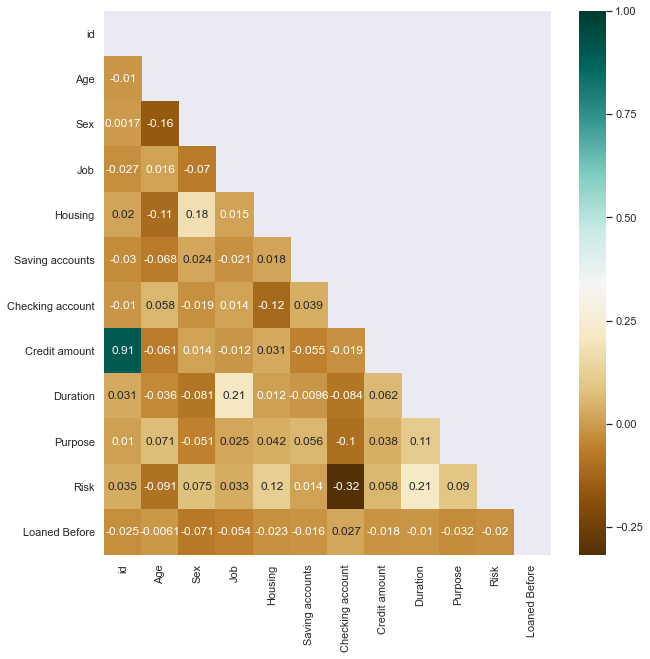

In [ ]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
_, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, mask=mask, cmap="BrBG", ax= ax);

#### According to the above hot map, two values
#### credit amout, id
#### have the most value, which means they have the most linear relationship, but we know from there
#### id
#### has nothing to do with banking information This linear relationship is irrelevant
#### (duration, Job) - (Risk, Duration) - (Housing - Sex)
#### also has the most linear relationship between them, which indicates that the more jobs we go to, the longer it takes.
#### The longer the time, the greater the risk
#### and men are generally better off with a home

<div dir=ltr>
    <h2>
Reduce dimensions    </h2>
</div>

<div dir=ltr>
To get PCA we do not need all the columns and for example the id or index column will not be useful for us, so we create a new dataframe and use the following columns.    <br/>
    'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'
    <br/>
</div>

In [ ]:
Listz = ['Age','Sex','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']
new_df = data[Listz]
new_df

,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,0,0,0,0,0,6,0
1,22,1,0,1,1,1,48,0
2,49,0,0,1,2,2,12,1
3,45,0,1,1,0,3,42,2
4,53,0,1,1,0,4,24,3
...,...,...,...,...,...,...,...,...
995,31,1,0,1,2,917,12,2
996,40,0,0,1,0,918,30,3
997,38,0,0,1,2,919,12,0
998,23,0,1,1,0,877,45,0


<div dir=ltr>
One of the things that can have a detrimental effect on our analysis is the difference in the sizes of the numbers in the different columns, so it is best to normalize the data.
</div>

In [ ]:
for col in new_df.columns: 
   new_df[col] = (new_df[col] - new_df[col].mean()) / new_df[col].std()
new_df

,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.765073,-0.669945,-0.597902,-1.133552,-1.343327,-1.675257,-1.235859,-1.285759
1,-1.190808,1.491168,-0.597902,-0.251410,-0.265216,-1.671507,2.247070,-1.285759
2,1.182721,-0.669945,-0.597902,-0.251410,0.812896,-1.667757,-0.738298,-0.672324
3,0.831087,-0.669945,0.685150,-0.251410,-1.343327,-1.664007,1.749509,-0.058890
4,1.534354,-0.669945,0.685150,-0.251410,-1.343327,-1.660257,0.256825,0.554545
...,...,...,...,...,...,...,...,...
995,-0.399632,1.491168,-0.597902,-0.251410,0.812896,1.763340,-0.738298,-0.058890
996,0.391544,-0.669945,-0.597902,-0.251410,-1.343327,1.767090,0.754386,0.554545
997,0.215727,-0.669945,-0.597902,-0.251410,0.812896,1.770840,-0.738298,-1.285759
998,-1.102900,-0.669945,0.685150,-0.251410,-1.343327,1.613347,1.998289,-1.285759


#### The criteria for the columns may be different, for example, the age difference when it is 1 unit. This 1 unit is not unique with a difference of 1 unit. Have a completely different

<div dir=ltr>
Now we need to obtain the covariance matrix of this data.
</div>

In [ ]:
cov_matrix = new_df.cov()
cov_matrix

,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Age,1.000000,-0.161694,-0.108437,-0.068435,0.057936,-0.060520,-0.036136,0.071069
Sex,-0.161694,1.000000,0.179137,0.024140,-0.019264,0.013903,-0.081432,-0.051436
Housing,-0.108437,0.179137,1.000000,0.018343,-0.121346,0.031040,0.011950,0.041964
Saving accounts,-0.068435,0.024140,0.018343,1.000000,0.038927,-0.054582,-0.009619,0.055598
Checking account,0.057936,-0.019264,-0.121346,0.038927,1.000000,-0.019116,-0.084226,-0.101034
Credit amount,-0.060520,0.013903,0.031040,-0.054582,-0.019116,1.000000,0.061716,0.038102
Duration,-0.036136,-0.081432,0.011950,-0.009619,-0.084226,0.061716,1.000000,0.105524
Purpose,0.071069,-0.051436,0.041964,0.055598,-0.101034,0.038102,0.105524,1.000000


<div dir=ltr>
Again, to get an idea of ​​this data, draw a heatmap of the covariance matrix
</div>

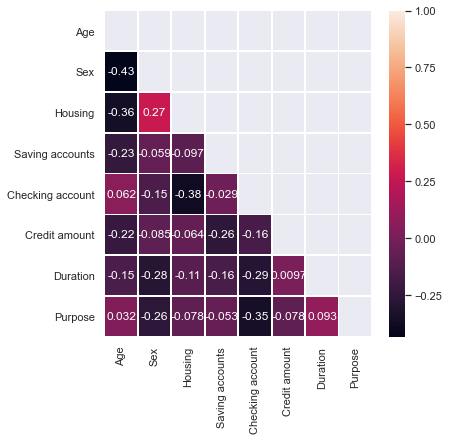

In [ ]:
mask = np.triu(np.ones_like(cov_matrix.corr(), dtype=np.bool))
_, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cov_matrix.corr(), annot=True, mask=mask, linewidths=.6, ax=ax);

<div dir=ltr>
We get the value and the specific vector of the covariance matrix.
</div>

In [ ]:
import scipy.linalg as la

In [ ]:
e_vals, e_vecs = la.eig(cov_matrix)
print(e_vals)
print(e_vecs)

[1.35559645+0.j 1.24017976+0.j 0.75286658+0.j 0.7985603 +0.j
 0.84938026+0.j 0.93702405+0.j 1.0044748 +0.j 1.06191779+0.j]
[[ 0.51112032 -0.14899326 -0.53021161 -0.26836404 -0.21154326  0.36587589
  -0.42790735  0.04114599]
 [-0.52521205  0.33321863 -0.51871389  0.47992183 -0.25252961  0.19224376
  -0.11347622 -0.0110846 ]
 [-0.55796565 -0.04823191  0.28843915 -0.59214818 -0.35324287  0.1743721
  -0.30627669  0.05932827]
 [-0.10431645  0.08620367 -0.28151613 -0.28519753  0.21229487  0.08746179
   0.41703549  0.77101282]
 [ 0.3249571   0.42472896  0.29642436  0.04017193 -0.59559011  0.31399005
   0.41304712  0.02453089]
 [-0.17254527 -0.23403897 -0.15814911 -0.18336006  0.24894292  0.54688222
   0.48147879 -0.51375799]
 [-0.06460777 -0.55264058 -0.26921105 -0.01105483 -0.55051357 -0.43478798
   0.35240175 -0.03904678]
 [-0.03402325 -0.56251971  0.31938995  0.47991851 -0.0431655   0.45211888
  -0.09837525  0.36623741]]


<div dir=ltr>
To select Principle Components, we do three small things: Relate each eigenvector to its corresponding eigenvalue (we can pair them together) Arrange the list of vectors and eigenvalues ​​according to eigenvalues We display the values ​​of the ordered properties in descending order in the output</div>

In [ ]:
dual_eign = [(e_vals[i], e_vecs[i]) for i in range(len(e_vals))]
print(dual_eign)
dual_eign.sort(key=lambda tup: tup[0], reverse= True)
print([dual_eign[i][0] for i in range(len(e_vals))])

[((1.3555964452819877+0j), array([ 0.51112032, -0.14899326, -0.53021161, -0.26836404, -0.21154326,
        0.36587589, -0.42790735,  0.04114599])), ((1.2401797635923983+0j), array([-0.52521205,  0.33321863, -0.51871389,  0.47992183, -0.25252961,
        0.19224376, -0.11347622, -0.0110846 ])), ((0.7528665790286151+0j), array([-0.55796565, -0.04823191,  0.28843915, -0.59214818, -0.35324287,
        0.1743721 , -0.30627669,  0.05932827])), ((0.7985603014543972+0j), array([-0.10431645,  0.08620367, -0.28151613, -0.28519753,  0.21229487,
        0.08746179,  0.41703549,  0.77101282])), ((0.8493802639838868+0j), array([ 0.3249571 ,  0.42472896,  0.29642436,  0.04017193, -0.59559011,
        0.31399005,  0.41304712,  0.02453089])), ((0.9370240494544751+0j), array([-0.17254527, -0.23403897, -0.15814911, -0.18336006,  0.24894292,
        0.54688222,  0.48147879, -0.51375799])), ((1.0044748041403517+0j), array([-0.06460777, -0.55264058, -0.26921105, -0.01105483, -0.55051357,
       -0.43478798,

<div dir=ltr>
We get all the explained variance and show it in the pie chart
</div>

[0.16944956+0.j 0.15502247+0.j 0.13273972+0.j 0.12555935+0.j
 0.11712801+0.j 0.10617253+0.j 0.09982004+0.j 0.09410832+0.j]


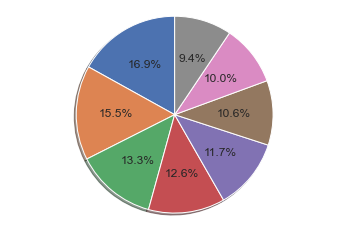

In [ ]:
exp_var = sorted(e_vals, reverse=True)/sum(e_vals)
print(exp_var)
_, ax1 = plt.subplots()
ax1.pie(exp_var, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

<div dir=ltr>
According to what we saw in the previous section, we select the number of components so that they cover at least 60% of the information, and then form a projection matrix using them.
    </div>

In [ ]:
comp_num = 0
for i in range(len(e_vals)):
    if sum(exp_var[0:i+1]) > 0.6:
        comp_num = i+1
        break
print("number of components: ", comp_num)
proj_matrix = np.array([dual_eign[i][1][0:comp_num] for i in range(len(e_vals))])
proj_matrix

number of components:  5


array([[ 0.51112032, -0.14899326, -0.53021161, -0.26836404, -0.21154326],
       [-0.52521205,  0.33321863, -0.51871389,  0.47992183, -0.25252961],
       [-0.03402325, -0.56251971,  0.31938995,  0.47991851, -0.0431655 ],
       [-0.06460777, -0.55264058, -0.26921105, -0.01105483, -0.55051357],
       [-0.17254527, -0.23403897, -0.15814911, -0.18336006,  0.24894292],
       [ 0.3249571 ,  0.42472896,  0.29642436,  0.04017193, -0.59559011],
       [-0.10431645,  0.08620367, -0.28151613, -0.28519753,  0.21229487],
       [-0.55796565, -0.04823191,  0.28843915, -0.59214818, -0.35324287]])

<div dir=ltr>
Using the matrix obtained in the previous step, we reduce X.
    And in a scatter diagram whose x and y are obtained from the first and second principal components, we show the results in terms of risk. 
</div>

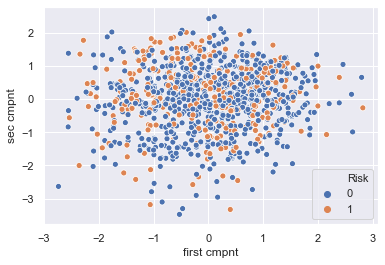

In [ ]:
X = new_df.values.dot(proj_matrix).T
pca_df = pd.DataFrame()
pca_df.insert(0, "first cmpnt", X[0], True)
pca_df.insert(1, "sec cmpnt", X[1], True)
pca_df.insert(2, "Risk", data['Risk'], True)
sns.scatterplot(data= pca_df, x= "first cmpnt", y= "sec cmpnt", hue= "Risk");

<div dir=ltr>
In this section we want to make a comparison between tSNE and PCA.
    For tSNE we use scikit learn and it is not necessary.
    We obtain the X transform using tSNE with two main components.
    Note that tSNE has different parameters that can be adjusted to achieve different results. We will explain our choice for these parameters.
</div>

### n_components:
#### The above parameter wants the final desired space, which is 2 here and is the same by default
### perplexity:
#### This parameter is related to the number of points closest to a point. Due to the library, as the number of data increases, we must increase this value as well, since the number of our data is not 1000 toasts and the complexity is not high. We do not touch the amount or reduce it if necessary. The initial value is 30
### early_exaggeration:
#### The distance of the neighbors in the final space can be changed with this parameter in such a way that if we increase this value, the distance of the neighbors in the final space will be less. This means that if we want the distance after fitting the model Decrease this value and increase it in the reverse mode. The initial value of this parameter is 12
### learning_rate:
#### Like the others
#### learnin rate
#### When finding the principal minimum, the loss function determines the value of the step approaching the minimum. Very small also has a low speed in addition to that can increase the likelihood of getting stuck in the seat point or local minimums. In our case, this value is not so important and its initial value is 200
### n_iter:
#### Number
#### iteration
#### Hosts to improve the answer, the initial value of which seems sufficient considering the problem and the amount of data. 250
### min_grad_norm:
#### threshold
#### is that if we reach that value, it means we have reached the minimum value and the algorithm stops and because in our problem
#### threshold
#### There is no obvious, we will not touch this amount either
### metric:
#### The criterion for calculating the distance of points is Euclidean by default. We can also use non-quadratic softs.
### random_state:
#### This is a parameter value that changes to different minima (local minima are different for this reason).

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
Xt = TSNE().fit_transform(new_df)
aim = pd.unique(data['Risk'].values)
aim_size = range(1, len(aim) + 1)
Y = data['Risk'].values
Xt

array([[  2.1242807, -17.344748 ],
       [-40.1946   ,   2.0225334],
       [  8.247701 , -16.372116 ],
       ...,
       [  4.1812825, -31.432207 ],
       [ 20.562565 ,  19.636986 ],
       [-16.677101 ,  -4.3551927]], dtype=float32)

<div dir=ltr>
Now, as we did in the previous sections, we draw a diagram of this conversion.
    We will write a brief description of these two diagrams.
</div>

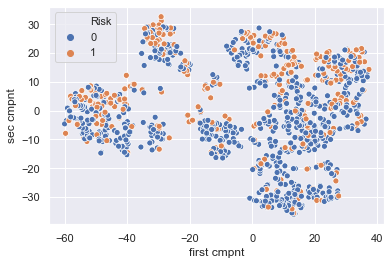

In [ ]:
t_df = pd.DataFrame() 
t_df.insert(0, "first cmpnt", Xt.T[0], True)
t_df.insert(1, "sec cmpnt", Xt.T[1], True)
t_df.insert(2, "Risk", data['Risk'], True)
sns.scatterplot(data= t_df, x= "first cmpnt", y= "sec cmpnt", hue= "Risk");

#### which is nonlinear "tsne" is a linear method so it can not measure nonlinear dependence unlike "pca" -1
#### "tsne" is probable based on covariance matrix and eigenvalues ​​s while "pca" -2
#### also preserves point neighbors "tsne" retains only general state while "pca" -3
#### This is not the case, they have "tsne" while in "pca" they have a great effect on "outlier" -4
#### can work better, especially if the classification issue is "tsne" -5